# Project 1 Android Malware Detection dataset

#### Mikołaj Mróz, Michał Binda

## Part 1 Data Preprocessing

### Installing packages

### Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


In [2]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from contextlib import contextmanager
from time import time
from tqdm import tqdm
import ipaddress
#import lightgbm as lgbm
#import category_encoders as ce

#from tensorflow.keras.utils import to_categorical
#from sklearn.metrics import classification_report, log_loss, accuracy_score
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import KFold

### Importing dataset, defining data types

In [3]:
# Define the data types for each column
dtypes = {"Package": str, "Category": str, "Malware": int}
for i in range(0, 64):
    dtypes[str(i)] = float

# Read in the CSV file with specified data types
data0 = pd.read_csv("Android_Malware.csv", dtype=dtypes, low_memory=False)

### Division into a training set and a validation set

In [4]:
X_train, X_test_tmp, y_train, y_test_tmp = train_test_split(
    data0[data0.columns.values[:-1]],
    data0[data0.columns.values[-1]],
    test_size=0.3, random_state=42)

In [5]:
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test_tmp,
    y_test_tmp,
    test_size=0.5, random_state=42)

In [6]:
X_validation

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
157981,872,10.42.0.151-104.192.110.245-56145-443-6,10.42.0.151,56145,104.192.110.245,443.0,6.0,22/06/2017 02:44:21,37,1,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285091,2821,10.42.0.151-10.42.0.1-4331-53-17,10.42.0.151,4331,10.42.0.1,53.0,17.0,30/06/2017 10:27:02,261325,1,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215565,2311,10.42.0.211-10.42.0.1-48403-53-17,10.42.0.211,48403,10.42.0.1,53.0,17.0,27/06/2017 05:29:01,47786,1,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164851,1446,10.42.0.151-119.146.74.48-36709-80-6,10.42.0.151,36709,119.146.74.48,80.0,6.0,22/06/2017 05:04:50,22452889,132,...,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96045,3356,10.42.0.151-10.42.0.1-63124-53-17,10.42.0.151,63124,10.42.0.1,53.0,17.0,15/06/2017 05:23:39,30924,1,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269416,1231,10.42.0.211-72.247.70.190-36236-80-6,10.42.0.211,36236,72.247.70.190,80.0,6.0,28/06/2017 09:38:00,23736,1,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215017,1763,151.101.209.140-10.42.0.211-443-53826-6,10.42.0.211,53826,151.101.209.140,443.0,6.0,27/06/2017 05:48:32,23678,1,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256790,342,10.42.0.211-103.235.46.212-43050-443-6,103.235.46.212,443,10.42.0.211,43050.0,6.0,27/06/2017 01:29:00,14,2,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79084,1837,183.56.172.95-10.42.0.151-80-57104-6,10.42.0.151,57104,183.56.172.95,80.0,6.0,14/06/2017 01:39:32,29027328,2,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")
print(f"No. of validating examples: {X_validation.shape[0]}")

No. of training examples: 248941
No. of testing examples: 53344
No. of validating examples: 53345


### Downloading dataset

In [8]:
# train.to_csv('train.csv', encoding = 'utf-8-sig') 
# files.download('train.csv')

In [9]:
# test.to_csv('test.csv', encoding = 'utf-8-sig') 
# files.download('test.csv')

In [10]:
# val.to_csv('val.csv', encoding = 'utf-8-sig') 
# files.download('val.csv')

## Exploration of a data frame

In [11]:
df = X_train 
df["Label"] = y_train

In [12]:
#deleting unnecessary spaces from beginning and end of column names so
#we can explore it easier
def deleteSpaces(df):
    df.columns = df.columns.str.strip()
    return df
df = deleteSpaces(df)

In [13]:

display(df[0:3].T)
print(df.shape)


,225329,97062,86892
Unnamed: 0,504,4373,2163
Flow ID,10.42.0.211-52.84.40.181-53064-443-6,10.42.0.151-52.40.87.241-39035-443-6,10.42.0.151-115.239.210.141-48498-443-6
Source IP,10.42.0.211,10.42.0.151,10.42.0.151
Source Port,53064,39035,48498
Destination IP,52.84.40.181,52.40.87.241,115.239.210.141
...,...,...,...
Idle Mean,0.0,0.0,0.0
Idle Std,0.0,0.0,0.0
Idle Max,0.0,0.0,0.0
Idle Min,0.0,0.0,0.0


(248941, 86)


In [14]:
print(df.columns.tolist())

['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag

In [15]:
df.head(20)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225329,504,10.42.0.211-52.84.40.181-53064-443-6,10.42.0.211,53064,52.84.40.181,443.0,6.0,28/06/2017 01:02:09,8958054,15,...,32.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_Scareware
97062,4373,10.42.0.151-52.40.87.241-39035-443-6,10.42.0.151,39035,52.40.87.241,443.0,6.0,15/06/2017 05:23:51,271,2,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_Adware
86892,2163,10.42.0.151-115.239.210.141-48498-443-6,10.42.0.151,48498,115.239.210.141,443.0,6.0,15/06/2017 02:15:49,38753377,3,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_Adware
128576,1418,10.42.0.211-10.42.0.1-23125-53-17,10.42.0.211,23125,10.42.0.1,53.0,17.0,15/06/2017 10:40:49,94428,1,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_Adware
346851,190,10.42.0.151-106.11.129.143-46195-80-6,10.42.0.151,46195,106.11.129.143,80.0,6.0,16/06/2017 08:12:07,536653,3,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign
190158,382,10.42.0.211-103.7.30.121-58452-8011-6,10.42.0.211,58452,103.7.30.121,8011.0,6.0,26/06/2017 10:32:47,551672,4,...,32.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_Scareware
339093,44,10.42.0.211-95.211.212.74-47723-1935-6,10.42.0.211,47723,95.211.212.74,1935.0,6.0,16/06/2017 09:49:54,115693483,76,...,32.0,6299258.25,5.897400e+06,14705396.0,105317.0,8.149084e+06,1.659377e+06,10663287.0,5694016.0,Benign
122411,2340,172.217.7.164-10.42.0.211-443-33189-6,10.42.0.211,33189,172.217.7.164,443.0,6.0,15/06/2017 02:19:38,62357987,9,...,32.0,166869.00,0.000000e+00,166869.0,166869.0,6.204488e+07,0.000000e+00,62044876.0,62044876.0,Android_Adware
300031,451,202.77.129.150-10.42.0.151-80-58277-6,10.42.0.151,58277,202.77.129.150,80.0,6.0,30/06/2017 01:16:57,2071596,6,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_SMS_Malware
291326,2023,10.42.0.211-104.254.66.16-49744-80-6,10.42.0.211,49744,104.254.66.16,80.0,6.0,11/07/2017 10:15:38,10177273,2,...,20.0,0.00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Android_SMS_Malware


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248941 entries, 225329 to 121958
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   248941 non-null  int64  
 1   Flow ID                      248940 non-null  object 
 2   Source IP                    248941 non-null  object 
 3   Source Port                  248941 non-null  int64  
 4   Destination IP               248941 non-null  object 
 5   Destination Port             248941 non-null  float64
 6   Protocol                     248941 non-null  float64
 7   Timestamp                    248941 non-null  object 
 8   Flow Duration                248941 non-null  int64  
 9   Total Fwd Packets            248941 non-null  int64  
 10  Total Backward Packets       248941 non-null  int64  
 11  Total Length of Fwd Packets  248941 non-null  float64
 12  Total Length of Bwd Packets  248941 non-null  float64

In [17]:
df.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,248941.000000,2.489410e+05,2.489410e+05,248941.000000,2.489410e+05,248941.000000,2.489410e+05,2.489410e+05,2.489410e+05,2.489410e+05,...,248937.000000,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05,2.489370e+05
mean,1942.975894,3.915884e+04,5.198036e+03,10.368869,1.093717e+07,7.276335,1.539142e+01,6.409457e+02,1.074095e+04,2.167553e+02,...,1.478639,-1.853726e+04,1.606309e+05,2.164195e+04,1.826366e+05,1.437017e+05,4.020583e+06,3.151827e+05,4.296683e+06,3.775756e+06
std,1838.614623,1.798059e+04,1.458438e+04,897.063212,2.181404e+07,75.399674,2.648345e+03,1.076564e+04,2.232390e+05,2.179986e+03,...,9.521983,4.595411e+06,8.789559e+05,2.813724e+05,1.014601e+06,8.417036e+05,1.441516e+07,2.847628e+06,1.513010e+07,1.407142e+07
min,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,-1.395062e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,637.000000,3.455900e+04,8.000000e+01,6.000000,4.889000e+04,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1568.000000,4.325400e+04,4.430000e+02,6.000000,5.615880e+05,2.000000,1.000000e+00,3.100000e+01,2.600000e+01,3.100000e+01,...,0.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2711.000000,5.229800e+04,4.430000e+02,6.000000,1.077745e+07,5.000000,4.000000e+00,4.310000e+02,3.040000e+02,3.490000e+02,...,1.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,14157.000000,1.045267e+06,1.328159e+06,442719.666667,1.199987e+08,27165.000000,1.319105e+06,4.393732e+06,3.741910e+07,1.072354e+06,...,3035.000000,1.705248e+08,9.718488e+07,4.020815e+07,9.718488e+07,9.718488e+07,1.198804e+08,7.737303e+07,1.198804e+08,1.198804e+08


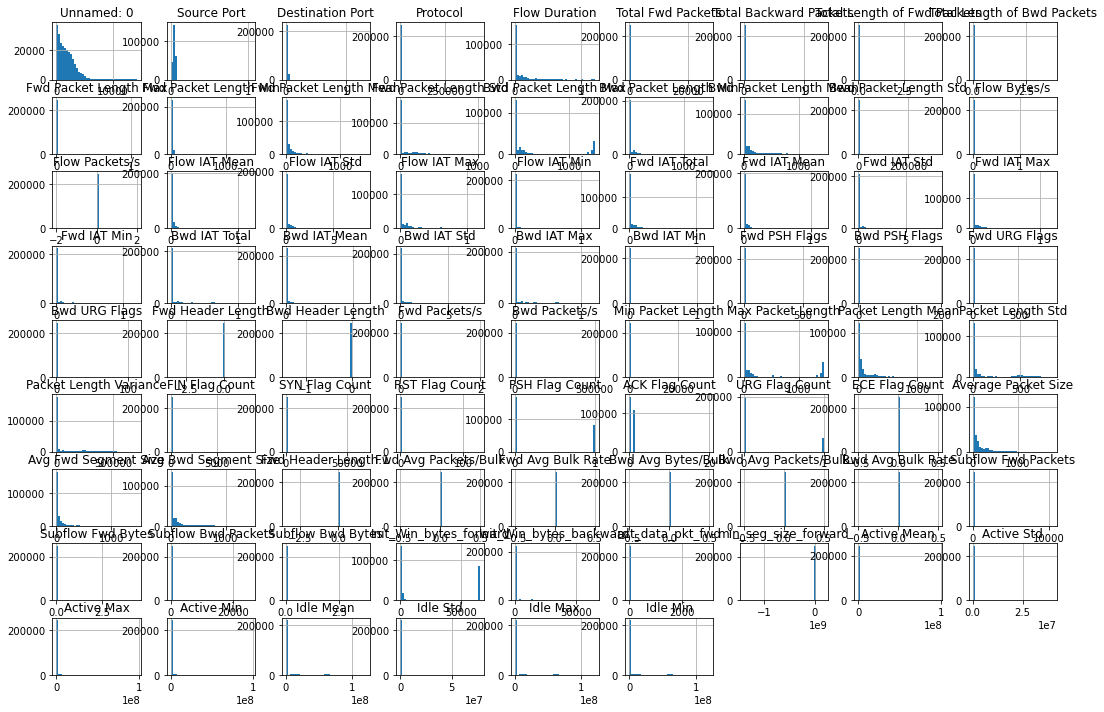

In [18]:
df.hist(bins = 40, figsize=(18, 12))

plt.show()

In [19]:
#Searching for nulls
df.isnull().sum().sum()

117

In [20]:

nan_values = df[df.isna().any(axis=1)]
print(nan_values)

        Unnamed: 0                                 Flow ID         Source IP  \
276556        2756                                     NaN                 0   
323136        2877                           7258830000000               281   
262292        2557                                    6923  291380.770637023   
285435        3165  172.217.10.238-10.42.0.151-443-50096-6       10.42.0.151   

        Source Port    Destination IP  Destination Port       Protocol  \
276556            0                 0      0.000000e+00       0.000000   
323136       124560  17794.2857142857      2.884435e+04   65812.000000   
262292      1045267                17      1.328159e+06  442719.666667   
285435        50096    172.217.10.238      4.430000e+02       6.000000   

                  Timestamp  Flow Duration  Total Fwd Packets  ...  \
276556                    0              0                  0  ...   
323136                    3              0                  0  ...   
262292     534188.

In [21]:
print(df['Label'].value_counts())
names=sorted(df['Label'].unique().tolist())
print(names)

Android_Adware         103311
Android_Scareware       81867
Android_SMS_Malware     47289
Benign                  16474
Name: Label, dtype: int64
['Android_Adware', 'Android_SMS_Malware', 'Android_Scareware', 'Benign']


In [22]:
#Checking unique values

for col in df.select_dtypes(include=["object"]).columns[:-1]:
  print(col)
print('----------------------------------------------')
names=df['Source IP'].unique().tolist()
print(len(names))
print('unique Source IP') #2257 unique Source IP

names=df['Destination IP'].unique().tolist()
print(len(names)) 
print('unique Destination IP')

names=df['Flow ID'].unique().tolist()
print(len(names)) 
print('unique Flow ID')

Flow ID
Source IP
Destination IP
Timestamp
CWE Flag Count
Down/Up Ratio
Fwd Avg Bytes/Bulk
----------------------------------------------
2260
unique Source IP
4381
unique Destination IP
149758
unique Flow ID


In [23]:
#counting correlation with Label CHECK
# corr = df.corr()[['Label']]
# sns.heatmap(corr, annot=True)
# corr['Label'] = abs(corr['Label'])
# print(corr)

In [24]:
#Finding columns with the same values
#It turned out that the columns that have NaN correlation with Label are the ones that have constant values
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print(const_cols)

['ECE Flag Count', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [25]:
df['Down/Up Ratio'].value_counts()

0.0       108064
1.0       106345
0          14363
1          11707
2.0         5486
3.0         1369
2            782
4.0          295
3            266
5.0           85
4             54
6.0           28
8.0           24
7.0           22
5             16
12.0           9
6              8
10.0           4
11.0           3
11             2
7              2
9.0            2
BENIGN         1
9              1
12             1
Name: Down/Up Ratio, dtype: int64

In [26]:
df['Down/Up Ratio'].value_counts()

0.0       108064
1.0       106345
0          14363
1          11707
2.0         5486
3.0         1369
2            782
4.0          295
3            266
5.0           85
4             54
6.0           28
8.0           24
7.0           22
5             16
12.0           9
6              8
10.0           4
11.0           3
11             2
7              2
9.0            2
BENIGN         1
9              1
12             1
Name: Down/Up Ratio, dtype: int64

In [27]:
#df_test = replace_strings(df_test)

In [28]:
df['Down/Up Ratio'].value_counts()

0.0       108064
1.0       106345
0          14363
1          11707
2.0         5486
3.0         1369
2            782
4.0          295
3            266
5.0           85
4             54
6.0           28
8.0           24
7.0           22
5             16
12.0           9
6              8
10.0           4
11.0           3
11             2
7              2
9.0            2
BENIGN         1
9              1
12             1
Name: Down/Up Ratio, dtype: int64

In [29]:
print((df['Down/Up Ratio']== 0.0).sum())

0


In [30]:
df['Down/Up Ratio'].value_counts()

0.0       108064
1.0       106345
0          14363
1          11707
2.0         5486
3.0         1369
2            782
4.0          295
3            266
5.0           85
4             54
6.0           28
8.0           24
7.0           22
5             16
12.0           9
6              8
10.0           4
11.0           3
11             2
7              2
9.0            2
BENIGN         1
9              1
12             1
Name: Down/Up Ratio, dtype: int64

In [31]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]

In [32]:
const_cols

['ECE Flag Count',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

# Modification of a data frame

## Functions

In [33]:
# This is the first function we used, it deletes spaces from beginning and end of column names
# so that working with dataframe is easier 
def deleteSpaces(df):
    df.columns = df.columns.str.strip()
    return df

In [34]:
# There is not a lot of Nans in this dataframe but we decided to replace them instead of deleting them
# Every Nan is replace with mode from column where it is, when there is no mode it is replaced with most
# often occuring value in this dataframe
def replace_nan_with_mode_or_random(df):
    for col in df.columns:
        if df[col].dtype == np.object:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
        else:
            if df[col].isnull().sum() == len(df[col]):
                continue
            elif len(df[col].mode()) > 0:
                mode_val = df[col].mode()[0]
                df[col].fillna(mode_val, inplace=True)
            else:
                random_val = df[col].dropna().sample(1).values[0]
                df[col].fillna(random_val, inplace=True)
    return df

In [35]:
# Define a function to replace string values with the mode of the column
def replace_strings(df):
    def replace_mode(column):
        # Convert the column to numeric
        column_numeric = pd.to_numeric(column, errors='coerce')

        # Calculate the mode of the numeric values
        mode_value = column_numeric.mode()[0]

        # Replace any string values with the mode
        column_replaced = column.where(column_numeric.notna(), mode_value)

        # Convert the column to float or int, as applicable
        column_replaced = pd.to_numeric(column_replaced, errors='coerce')

        return column_replaced

    # Apply the replace_mode function to each column
    df['Down/Up Ratio'] = replace_mode(df['Down/Up Ratio'])
    df['CWE Flag Count'] = replace_mode(df['CWE Flag Count'])
    df['Fwd Avg Bytes/Bulk'] = replace_mode(df['Fwd Avg Bytes/Bulk'])
    return df

In [36]:
# At first we wanted to replace this date column but then we decided to modify it into Year, Month and Day
# We did not do anything to hour time, because we do not know if it is PM or AM
def modify_timestamp(df):
    def extract_date(timestamp_str):
        # check if the timestamp is in the correct format
        try:
            timestamp_obj = pd.to_datetime(timestamp_str, format='%d/%m/%Y %H:%M:%S')
        except ValueError:
            # if the format is incorrect, replace it with the most frequent value in the 'Timestamp' column
            timestamp_obj = pd.to_datetime(df['Timestamp'].value_counts().index[0], format='%d/%m/%Y %H:%M:%S')

        year = timestamp_obj.year
        month = timestamp_obj.month
        day = timestamp_obj.day
        return year, month, day
    
    df[['Year', 'Month', 'Day']] = df['Timestamp'].apply(extract_date).apply(pd.Series)
    return df


In [37]:
# Down Up Ratio is an Object Column, it is because we have values like '4' and '4.0'
# we decided to change it to Int type
def changeTypeForInt(df):
    df['Down/Up Ratio']=df['Down/Up Ratio'].apply(lambda x:int(float(x)))
    return df

In [38]:
#coding Label column, we decided to code this column so that it works better with our model

#{'Android_Adware': 0, 'Android_SMS_Malware': 1, 'Android_Scareware': 2, 'Benign': 3} 

#['Android_Adware', 'Android_SMS_Malware', 'Android_Scareware', 'Benign']
def labelencoder(df):
    # define the label mapping
    label_mapping = {'Android_Adware': 0, 'Android_SMS_Malware': 1, 'Android_Scareware': 2, 'Benign': 3}

    # encode the 'Label' column using map() method
    df['Label'] = df['Label'].map(label_mapping)
    return df

In [39]:
# We deleted columns where the values are the same, they do not influence or Label prediction
def deleteConstCols(df2):
    const_cols = ['ECE Flag Count',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']
    #usunięcie
    df2.drop(columns=const_cols, inplace=True)
    return df2

In [40]:
#not sure if we will use it
def CorrColumns(df2):
    corr_matrix = df2.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    if to_drop:
        df3 = df2.drop(to_drop, axis=1)
    return df3

In [41]:
# We decided to replace this rows because they were clearly wrong
def delete_wrong_rows(df):
    index_to_drop = df[df['Down/Up Ratio'] == 'BENIGN'].index.to_list()
    df.drop(index_to_drop, axis=0, inplace=True)
#     index_to_drop = df[df['Timestamp'] == '0'].index.to_list()
#     df.drop(index_to_drop, axis=0, inplace=True)
    return df

In [42]:
# There is 2 columns with ID adresses that are Object Type
# We cannot leave them, we decided to change them first into binary and then into decimal
# There were some wrong IP addresses that could not be modified, we decided to replace them
# We replaced them with the most often ocurring value in a column
# modify so it replaces with mode

import ipaddress

def replace_invalid_ip_addresses(df, col_name):
    """
    Replaces the invalid IP addresses in the given DataFrame column with the most frequently occurring valid IP address.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame to modify.
        col_name (str): The name of the column containing the IP addresses to check.
        
    Returns:
        None
    """
    ip_series = df[col_name]
    invalid_mask = pd.Series(dtype=bool, index=ip_series.index)
    for i, ip in ip_series.items():
        try:
            ipaddress.ip_address(ip)
            invalid_mask.at[i] = False
        except ValueError:
            invalid_mask.at[i] = True
    
    invalid_indices = invalid_mask[invalid_mask].index
    valid_ips = ip_series[~invalid_mask]
    most_common_ip = valid_ips.mode()[0]
    
    df.loc[invalid_indices, col_name] = most_common_ip
    
    print(f"Replaced {len(invalid_indices)} rows with invalid IP addresses with the most frequently occurring valid IP address: {most_common_ip}")
    return df

In [43]:
def transform_ip(df):
    ip = list(df['Source IP'])
    ip = [[int(ip[i].split('.')[j]) for j in range(len(ip[i].split('.')))] for i in range(len(ip))]
    ip = pd.DataFrame(ip).fillna(0)
    ip.columns = ['Source IP1','Source IP2',"Source IP3","Source IP4"]
    ip2 = list(df['Destination IP'])
    ip2 = [[int(ip2[i].split('.')[j]) for j in range(len(ip2[i].split('.')))] for i in range(len(ip2))]
    ip2 = pd.DataFrame(ip2).fillna(0)
    ip2.columns = ['Destination IP1','Destination IP2',"Destination IP3","Destination IP4"]
    ip = pd.concat([ip,ip2], axis = 1)
    df = pd.concat([df.reset_index(),ip],axis = 1).drop('index', axis = 1)
    
    return df

In [44]:
# We delete columns that we either modified or divided into other columns and these are not necessary anymore
def delete_unnecessary_columns(df):
    df = df.drop('Timestamp', axis = 1)
    df = df.drop('Flow ID', axis = 1)
    df = df.drop('Unnamed: 0', axis = 1)
    df = df.drop('Source IP', axis = 1)
    df = df.drop('Destination IP', axis = 1)
#     df = df.drop('Month', axis = 1)
#     df = df.drop('Day', axis = 1)
    cols = list(df.columns)
    if 'Fwd Avg Bytes/Bulk' in cols:
        df=df.drop('Fwd Avg Bytes/Bulk',axis=1)
        
    if 'CWE Flag Count' in cols:
        df=df.drop('CWE Flag Count',axis=1)
    return df

In [45]:
def move_label_to_end(df):
    """
    Move column 'Label' to the end of the Pandas dataframe 'df'.
    """
    cols = list(df.columns)
    if 'Label' in cols:
        cols.remove('Label')
        cols.append('Label')
        return df[cols]
    else:
        raise ValueError("The dataframe does not have a column named 'Label'.")

In [46]:
# This function takes dataset as an input and outputs preprocessed data frame, ready to put into model
def preprocess(X, y):
    df = X
    df["Label"] = y
    
    df = deleteSpaces(df)
#     df = modify_timestamp(df)
    df = replace_nan_with_mode_or_random(df)
    df2 = delete_wrong_rows(df)
    df2 = changeTypeForInt(df2)
    df2 = deleteConstCols(df2)
    df3 = replace_invalid_ip_addresses(df2, 'Source IP')
    df4 = replace_invalid_ip_addresses(df3, 'Destination IP')
    df4 = transform_ip(df4)
    df4 = labelencoder(df4)
    df4 = delete_unnecessary_columns(df4)
    df4 = move_label_to_end(df4)
    return df4.drop("Label", axis=1), df4["Label"]


In [47]:
# Define a custom Gini scorer
def gini(y_true, y_pred):
    gini_coeff = 1.0 - (accuracy_score(y_true, y_pred) ** 2) # Gini coefficient formula
    return gini_coeff

## Testing written functions on training dataset

In [48]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225329,504,10.42.0.211-52.84.40.181-53064-443-6,10.42.0.211,53064,52.84.40.181,443.0,6.0,28/06/2017 01:02:09,8958054,15,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Scareware
97062,4373,10.42.0.151-52.40.87.241-39035-443-6,10.42.0.151,39035,52.40.87.241,443.0,6.0,15/06/2017 05:23:51,271,2,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
86892,2163,10.42.0.151-115.239.210.141-48498-443-6,10.42.0.151,48498,115.239.210.141,443.0,6.0,15/06/2017 02:15:49,38753377,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
128576,1418,10.42.0.211-10.42.0.1-23125-53-17,10.42.0.211,23125,10.42.0.1,53.0,17.0,15/06/2017 10:40:49,94428,1,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
346851,190,10.42.0.151-106.11.129.143-46195-80-6,10.42.0.151,46195,106.11.129.143,80.0,6.0,16/06/2017 08:12:07,536653,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## Model Implementation

In [49]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53344 entries, 333812 to 147615
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    53344 non-null  int64  
 1   Flow ID                       53344 non-null  object 
 2    Source IP                    53344 non-null  object 
 3    Source Port                  53344 non-null  int64  
 4    Destination IP               53344 non-null  object 
 5    Destination Port             53344 non-null  float64
 6    Protocol                     53344 non-null  float64
 7    Timestamp                    53344 non-null  object 
 8    Flow Duration                53344 non-null  int64  
 9    Total Fwd Packets            53344 non-null  int64  
 10   Total Backward Packets       53344 non-null  int64  
 11  Total Length of Fwd Packets   53344 non-null  float64
 12   Total Length of Bwd Packets  53344 non-null  float64


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, classification_report
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  roc_curve, roc_auc_score, auc
from sklearn.metrics import  precision_recall_curve, average_precision_score
from xgboost import XGBClassifier # Inna paczka niż sklearn!
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
random_state = 42

In [51]:
X_test2, y_test2 = preprocess(X_test, y_test)
X_train2, y_train2 = preprocess(X_train, y_train)

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

Replaced 0 rows with invalid IP addresses with the most frequently occurring valid IP address: 10.42.0.211
Replaced 0 rows with invalid IP addresses with the most frequently occurring valid IP address: 10.42.0.1


C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

Replaced 2 rows with invalid IP addresses with the most frequently occurring valid IP address: 10.42.0.211
Replaced 2 rows with invalid IP addresses with the most frequently occurring valid IP address: 10.42.0.1


In [52]:
X_val2, y_val2 = preprocess(X_validation, y_validation)

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[col].dtype == np.object:
C:\Users\mroz.m\AppData\Local\Temp\ipykernel_25788\3174119451.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by

Replaced 0 rows with invalid IP addresses with the most frequently occurring valid IP address: 10.42.0.211
Replaced 0 rows with invalid IP addresses with the most frequently occurring valid IP address: 10.42.0.1


In [53]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53344 entries, 0 to 53343
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source Port                  53344 non-null  int64  
 1   Destination Port             53344 non-null  float64
 2   Protocol                     53344 non-null  float64
 3   Flow Duration                53344 non-null  int64  
 4   Total Fwd Packets            53344 non-null  int64  
 5   Total Backward Packets       53344 non-null  int64  
 6   Total Length of Fwd Packets  53344 non-null  float64
 7   Total Length of Bwd Packets  53344 non-null  float64
 8   Fwd Packet Length Max        53344 non-null  float64
 9   Fwd Packet Length Min        53344 non-null  float64
 10  Fwd Packet Length Mean       53344 non-null  float64
 11  Fwd Packet Length Std        53344 non-null  float64
 12  Bwd Packet Length Max        53344 non-null  float64
 13  Bwd Packet Lengt

In [54]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248940 entries, 0 to 248939
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source Port                  248940 non-null  int64  
 1   Destination Port             248940 non-null  float64
 2   Protocol                     248940 non-null  float64
 3   Flow Duration                248940 non-null  int64  
 4   Total Fwd Packets            248940 non-null  int64  
 5   Total Backward Packets       248940 non-null  int64  
 6   Total Length of Fwd Packets  248940 non-null  float64
 7   Total Length of Bwd Packets  248940 non-null  float64
 8   Fwd Packet Length Max        248940 non-null  float64
 9   Fwd Packet Length Min        248940 non-null  float64
 10  Fwd Packet Length Mean       248940 non-null  float64
 11  Fwd Packet Length Std        248940 non-null  float64
 12  Bwd Packet Length Max        248940 non-null  float64
 13 

In [55]:
X_train2.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Idle Max,Idle Min,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4
0,53064,443.0,6.0,8958054,15,10,3206.0,2696.0,567.0,0.0,...,0.0,0.0,10,42,0,211,52,84,40,181
1,39035,443.0,6.0,271,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,10,42,0,151,52,40,87,241
2,48498,443.0,6.0,38753377,3,1,0.0,0.0,0.0,0.0,...,0.0,0.0,10,42,0,151,115,239,210,141
3,23125,53.0,17.0,94428,1,1,33.0,94.0,33.0,33.0,...,0.0,0.0,10,42,0,211,10,42,0,1
4,46195,80.0,6.0,536653,3,6,1169.0,3336.0,1169.0,0.0,...,0.0,0.0,10,42,0,151,106,11,129,143


In [56]:
y_train2.head()

0    2
1    0
2    0
3    0
4    3
Name: Label, dtype: int64

## Random Forest Classfier

Most important features:
Source Port: 0.061712
Source IP4: 0.055549
Flow IAT Min: 0.044235
Flow IAT Max: 0.043840
Flow Duration: 0.043292
Fwd Packets/s: 0.042278
Flow Packets/s: 0.041858
Flow IAT Mean: 0.041828
Destination IP3: 0.034200
Bwd Packets/s: 0.028676


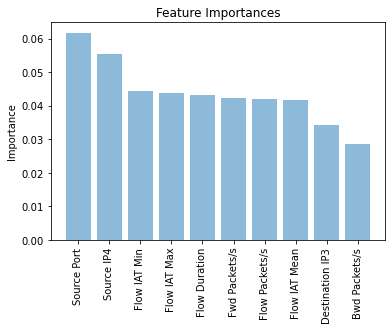

Accuracy: 0.627249550089982
Precision: 0.6208074140528875
Top 10 features: ['Source Port', 'Source IP4', 'Flow IAT Min', 'Flow IAT Max', 'Flow Duration', 'Fwd Packets/s', 'Flow Packets/s', 'Flow IAT Mean', 'Destination IP3', 'Bwd Packets/s']


In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score

# Train the Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train2, y_train2)

# Get feature importances
importances = model.feature_importances_

# Create a dictionary of feature names and their importances
feature_importances = dict(zip(X_train2.columns[:-1], importances))

# Sort the dictionary in descending order of importance
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Most important features:")
top_features = []
for feature, importance in sorted_importances:
    print("%s: %f" % (feature, importance))
    top_features.append(feature)
    if len(top_features) == 10:
        break

# Plot the feature importances
features, importances = zip(*sorted_importances[:10])
y_pos = np.arange(len(features))
plt.bar(y_pos, importances, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Test the model and print the accuracy and precision scores
y_pred2 = model.predict(X_test2)
accuracy = model.score(X_test2, y_test2)
precision = precision_score(y_test2, y_pred2, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)

# Return the top 10 features
print("Top 10 features:", top_features)

In [56]:
# Create and fit the Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = rfc.predict(X_test2)

# Display the classification report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72     22089
           1       0.65      0.54      0.59     10086
           2       0.56      0.59      0.57     17618
           3       0.49      0.21      0.29      3551

    accuracy                           0.63     53344
   macro avg       0.60      0.53      0.54     53344
weighted avg       0.62      0.63      0.62     53344



## Decision Tree Classifier

Most important features:
Source Port: 0.223986
Source IP4: 0.072035
Destination IP3: 0.057029
Destination IP2: 0.041191
Flow IAT Min: 0.035078
Destination Port: 0.032489
Flow Bytes/s: 0.028003
Flow Duration: 0.023742
Destination IP1: 0.022342
Bwd Packets/s: 0.021345


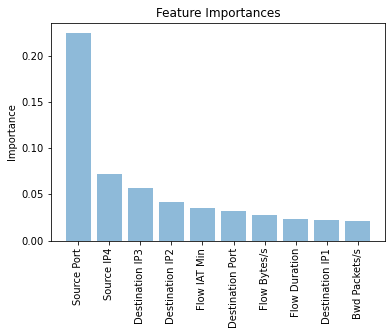

Accuracy: 0.6710032993401319
Precision: 0.6717314189535598
Top 10 features: ['Source Port', 'Source IP4', 'Destination IP3', 'Destination IP2', 'Flow IAT Min', 'Destination Port', 'Flow Bytes/s', 'Flow Duration', 'Destination IP1', 'Bwd Packets/s']


In [57]:
# Decision Tree Classifier
# with precision
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Train the Decision Tree Classifier model
model = DecisionTreeClassifier()
model.fit(X_train2, y_train2)

# Get feature importances
importances = .

# Create a dictionary of feature names and their importances
feature_importances = dict(zip(X_train2.columns[:-1], importances))

# Sort the dictionary in descending order of importance
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Most important features:")
top_features = []
for feature, importance in sorted_importances:
    print("%s: %f" % (feature, importance))
    top_features.append(feature)
    if len(top_features) == 10:
        break

# Plot the feature importances
features, importances = zip(*sorted_importances[:10])
y_pos = np.arange(len(features))
plt.bar(y_pos, importances, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Test the model and print the accuracy and precision scores
y_pred2 = model.predict(X_test2)
accuracy = model.score(X_test2, y_test2)
precision = precision_score(y_test2, y_pred2, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)

# Return the top 10 features
print("Top 10 features:", top_features)


In [58]:
# Create and fit the Decision Tree Classifier
rfc = DecisionTreeClassifier()
rfc.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = rfc.predict(X_test2)

# Display the classification report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     22089
           1       0.62      0.67      0.64     10086
           2       0.65      0.62      0.63     17618
           3       0.46      0.46      0.46      3551

    accuracy                           0.67     53344
   macro avg       0.62      0.62      0.62     53344
weighted avg       0.67      0.67      0.67     53344



## XGB Classifier

Most important features:
Packet Length Variance: 0.066054
Subflow Bwd Bytes: 0.061809
Source IP4: 0.050518
Destination IP2: 0.031955
Destination IP3: 0.028931
Destination IP1: 0.026431
PSH Flag Count: 0.023737
min_seg_size_forward: 0.022966
Max Packet Length: 0.022737
Protocol: 0.020829


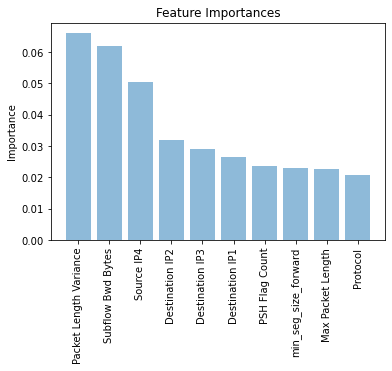

Accuracy: 0.7432888422315537
Precision: 0.7443549033828635
Top 10 features: ['Packet Length Variance', 'Subflow Bwd Bytes', 'Source IP4', 'Destination IP2', 'Destination IP3', 'Destination IP1', 'PSH Flag Count', 'min_seg_size_forward', 'Max Packet Length', 'Protocol']


In [57]:
# XGB Classifier
# with precision
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Train the XGB Classifier model
model=XGBClassifier(random_state=1,
                    n_estimators = 100,
                    learning_rate=0.75, # Szybkość "uczenia" się
                    booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                    max_depth=15
                    )
model.fit(X_train2, y_train2)

# Get feature importances
importances = model.feature_importances_

# Create a dictionary of feature names and their importances
feature_importances = dict(zip(X_train2.columns[:-1], importances))

# Sort the dictionary in descending order of importance
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
print("Most important features:")
top_features = []
for feature, importance in sorted_importances:
    print("%s: %f" % (feature, importance))
    top_features.append(feature)
    if len(top_features) == 10:
        break

# Plot the feature importances
features, importances = zip(*sorted_importances[:10])
y_pos = np.arange(len(features))
plt.bar(y_pos, importances, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Test the model and print the accuracy and precision scores
y_pred2 = model.predict(X_test2)
accuracy = model.score(X_test2, y_test2)
precision = precision_score(y_test2, y_pred2, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)

# Return the top 10 features
print("Top 10 features:", top_features)

In [60]:
# Create and fit the XGBoost classifier
xgb_clf = XGBClassifier(random_state=1,
                    n_estimators = 100,
                    learning_rate=0.75, # Szybkość "uczenia" się
                    booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                    max_depth=15
                    )
xgb_clf.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = xgb_clf.predict(X_test2)

# Display the classification report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81     22089
           1       0.75      0.66      0.70     10086
           2       0.68      0.73      0.70     17618
           3       0.77      0.42      0.55      3551

    accuracy                           0.74     53344
   macro avg       0.75      0.66      0.69     53344
weighted avg       0.74      0.74      0.74     53344



[[18694   409  2763   223]
 [ 1030  6664  2331    61]
 [ 3027  1643 12795   153]
 [ 1062   141   851  1497]]


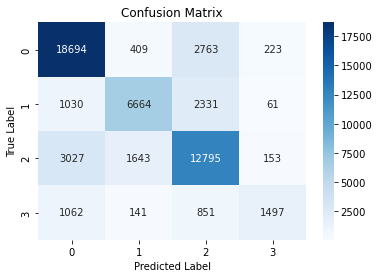

In [61]:
#{'Android_Adware': 0, 'Android_SMS_Malware': 1, 'Android_Scareware': 2, 'Benign': 3} 

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test2,y_pred2)
print(cm)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

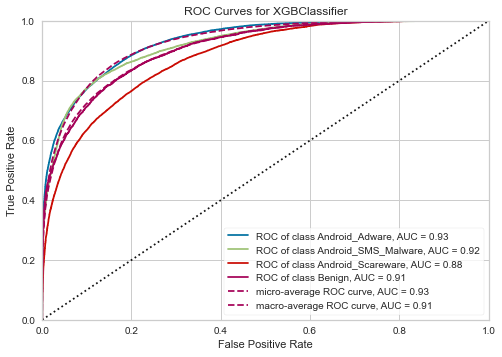

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [60]:
from yellowbrick.classifier import ROCAUC

# Instantiate XGBoost model with hyperparameters
model = XGBClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.75,
    booster='gbtree',
    max_depth=15
)

# Instantiate ROCAUC visualizer with class encoder
visualizer = ROCAUC(model, encoder={0: 'Android_Adware', 1: 'Android_SMS_Malware', 2: 'Android_Scareware', 3: 'Benign'})

# Fit visualizer on the training set
visualizer.fit(X_train2, y_train2)

# Score visualizer on the test set
visualizer.score(X_test2, y_test2)

# Display the ROC-AUC visualization
visualizer.show()




In [63]:
visualizer.show(outpath="roc_curve2.png")

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 576x396 with 0 Axes>

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
}

model = XGBClassifier(random_state=1, booster='gbtree')

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train2, y_train2)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

model = XGBClassifier(random_state=1, booster='gbtree', **best_params)
model.fit(X_train2, y_train2)

accuracy = model.score(X_test2, y_test2)
print("Accuracy:", accuracy)


In [68]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)
param_grid = {
    'max_depth': [3], 
    'n_estimators': [10],
    'max_features': [None],
}

recall_poor = make_scorer(recall_score, average = None, labels=[1])
grid_model_rfc = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_poor,
    refit=True,
#     verbose=2,
    n_jobs=-1,
    cv=5,
)